In [1]:
import time
import math
import numpy as np
import sys
sys.path.insert(0, '..')
import ccal
%matplotlib inline

================= Computational Cancer Analysis Library (CCAL) =================
<174544> Planted a random seed 20121020.


# NMF

In [2]:
A = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/data/ccle_hema/ccle_hema_gene_filtered.gct')

#nmf_results = ccal.support.nmf(A, range(3, 21, 3))
nmf_results, nmf_scores = ccal.support.nmf_and_score(A, [4,5,6], n_clusterings=3)

<174544> Scoring NMF with cophenetic correlation from consensus-clustering (3 clusterings) ...
<174544> Parallelizing ...
<174544> NMF and scoring k=4 ...
<174544> 	(k=4) NMF (0/3) ...
<174544> NMF and scoring k=6 ...
<174544> 	(k=6) NMF (0/3) ...
<174544> NMF and scoring k=5 ...
<174544> 		(k=4) Saved the 1st NMF decomposition.
<174544> 	(k=5) NMF (0/3) ...
<174544> 	(k=4) Counting co-clusterings of 3 NMF ...
<174544> 		(k=5) Saved the 1st NMF decomposition.
<174544> 	(k=4) Computed the cophenetic correlations.
<174544> 	(k=5) Counting co-clusterings of 3 NMF ...
<174544> 		(k=6) Saved the 1st NMF decomposition.
<174544> 	(k=5) Computed the cophenetic correlations.
<174544> 	(k=6) Counting co-clusterings of 3 NMF ...
<174544> 	(k=6) Computed the cophenetic correlations.


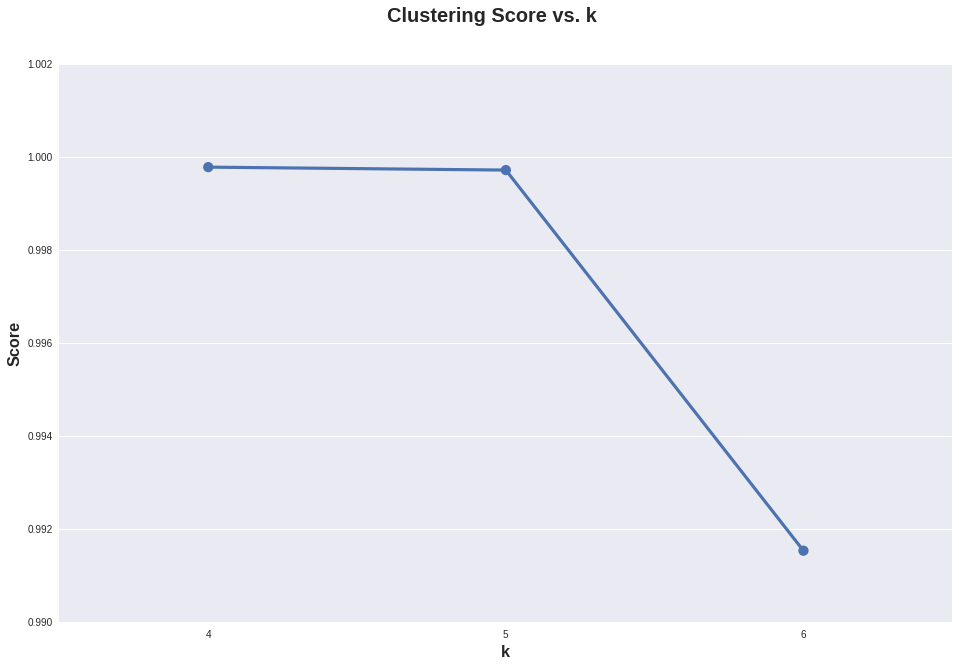

In [8]:
ccal.plot_clustering_scores(nmf_scores
                           )

# Normalize pandas object

In [ ]:
import pandas as pd
import numpy as np
import sys
sys.path.insert(0, '..')
import ccal
normalize_pandas_object = ccal.support.normalize_pandas_object

shape = (5, 5)
df = pd.DataFrame(np.random.choice([0, 2], shape))
df.iloc[0,:] = 1
df.iloc[1,:] = 0
df.iloc[2,:] = 100
df

df.apply(lambda r: r * 2, axis=0)

df.apply(lambda r: r * 2, axis=1)

df.apply(lambda r: r * r.name, axis=0)

df.apply(lambda r: r * r.name, axis=1)

normalize_pandas_object(df)

normalize_pandas_object(df, axis=0)

normalize_pandas_object(df, axis=1)

normalize_pandas_object(df, method='0-1')

normalize_pandas_object(df, method='0-1', axis=0)

normalize_pandas_object(df, method='0-1', axis=1)

s = df.iloc[:, 2]
s

normalize_pandas_object(s)

normalize_pandas_object(s, axis=0)

normalize_pandas_object(s, axis=1)

# Information

## Test data type cases

In [ ]:
x = np.random.random_sample(10)
y = np.random.random_sample(10)
print(ccal.information.information_coefficient(x, y))

x = np.random.random_sample(10)
y = np.random.random_sample(11)
try:
    ccal.information.information_coefficient(x, y)
except ValueError as e:
    print(e)

x = np.random.random_sample(10)
x[1] = None
y = np.random.random_sample(10)
y[2] = None
print(ccal.information.information_coefficient(x, y))

x = np.random.random_sample(10)
x[1] = None
y = np.random.random_sample(10)
y[2] = None
y[6] = None
print(ccal.information.information_coefficient(x, y))

x = np.random.random_sample(10)
x[1] = None
x[3] = None
x[5] = None
y = np.random.random_sample(10)
y[2] = None
y[4] = None
print(ccal.information.information_coefficient(x, y))

x = np.array([12.517, 14.706, np.nan, 14.12, np.nan, np.nan, np.nan, 12.255])
y = np.array([0.98246356, 0.97525171, 0.77744759, 0.64084311, 0.4405853, 0.43827196, 0.12447757, 0.08116039])
print(ccal.information.information_coefficient(x, y))

# Time KDE implementations

In [ ]:
n = 10
size = 1000

## R's bcv & kde2d

In [ ]:
import rpy2.robjects as ro
from rpy2.robjects.packages import importr
from rpy2.robjects.numpy2ri import numpy2ri

ro.conversion.py2ri = numpy2ri
mass = importr('MASS')

for p in range(2, 5):
    n_grids = math.pow(2, p) + 1
    t0 = time.time()
    for i in range(n):
        x = np.random.random_sample(size)
        y = np.random.random_sample(size)
        bandwidth_x = np.asarray(mass.bcv(x)[0])
        bandwidth_y = np.asarray(mass.bcv(y)[0])
        kde = mass.kde2d(x, y, np.asarray([bandwidth_x, bandwidth_y]), n=np.asarray([n_grids]))
    print(int(n_grids), '\t', time.time() - t0)

## fastKDE

In [ ]:
# from fastkde import fastKDE

# for p in range(2, 10):
#     n_grids = math.pow(2, p) + 1
#     t0 = time.time()
#     for i in range(n):
#         x = np.random.random_sample(size)
#         y = np.random.random_sample(size)
#         pdf, axes = fastKDE.pdf(x, y, numPoints=n_grids)
#     print(int(n_grids), '\t', time.time() - t0)

## KDEMultivariate
### Higher overhead. Can specify bandwidth. Slowest.

In [ ]:
from statsmodels.nonparametric.kernel_density import KDEMultivariate

t0 = time.time()
for i in range(n):
    x = np.random.random_sample(size)
    y = np.random.random_sample(size)
    kde = KDEMultivariate([x, y], var_type='cc', bw=[0.1, 0.1])
    kde.pdf()
time.time() - t0

## gaussian_kde
### Faster. Can't specify bandwidth.

In [ ]:
from scipy.stats import gaussian_kde

t0 = time.time()
for i in range(n):
    x = np.random.random_sample(size)
    y = np.random.random_sample(size)
    kde = gaussian_kde([x, y], bw_method='silverman')
    kde.pdf(np.random.random_sample((2, 25)))
time.time() - t0

# Time information_coefficient implementations

## Wrapped R using P and H

In [ ]:
t0 = time.time()
for i in range(n):
    x = np.random.random_sample(size)
    y = np.random.random_sample(size)
    ccal.information.information_coefficient(x, y)
print(time.time() - t0)

In [ ]:
from rpy2.robjects.packages import SignatureTranslatedAnonymousPackage


# TODO: refactor
r = '''
    information_coefficient <- function(x, y, n.grid = 25) {
        x.set <- !is.na(x)
        y.set <- !is.na(y)
        overlap <- x.set & y.set

        x <- x[overlap] + 1e-09 * runif(length(overlap))
        y <- y[overlap] + 1e-09 * runif(length(overlap))

        if (length(x) > 2) {
            delta <- c(bcv(x), bcv(y))
            cor <- cor(x, y)

            bandwidths <- delta * (1 + (-0.75) * abs(cor))
            
            kde2d.xy <- kde2d(x, y, bandwidths, n = n.grid)
            fxy <- kde2d.xy$z + .Machine$double.eps
            dx <- kde2d.xy$x[2] - kde2d.xy$x[1]
            dy <- kde2d.xy$y[2] - kde2d.xy$y[1]
            pxy <- fxy/(sum(fxy) * dx * dy)
            px <- rowSums(pxy) * dy
            py <- colSums(pxy) * dx

            # hxy <- -sum(pxy * log(pxy)) * dx * dy
            # hx <- -sum(px * log(px)) * dx
            # hy <- -sum(py * log(py)) * dy
            # mi <- hx + hy - hxy

            px <- matrix(px, nrow = n.grid, ncol = n.grid)
            py <- matrix(py, byrow = TRUE, nrow = n.grid, ncol = n.grid)
            mi <- sum(pxy * log(pxy/(px * py))) * dx * dy

            ic <- sign(cor) * sqrt(1 - exp(-2 * mi))

            if (is.na(ic)) {
                ic <- 0
            }
        } else {
            ic <- 0
        }
        return(ic)
    }
    '''
r = SignatureTranslatedAnonymousPackage(r, 'r')

t0 = time.time()
for i in range(n):
    x = np.random.random_sample(size)
    y = np.random.random_sample(size)
    r.information_coefficient(x, y)
print(time.time() - t0)

## Using KDEMultivariate

In [ ]:
from numpy import asarray
from numpy.random import random_sample
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from scipy.stats import pearsonr

drop_nan_columns = ccal.support.drop_nan_columns

def information_coefficient_statsmodels(x, y, data_types='cc', n_grids=25, jitter=1E-10):
    x, y = drop_nan_columns([x, y])
    if len(x) < 3 or len(y) < 3:
        return 0
    x = asarray(x, dtype=float)
    y = asarray(y, dtype=float)
    x += random_sample(x.size) * jitter
    y += random_sample(y.size) * jitter

    cor, p = pearsonr(x, y)    
    bandwidth_x = np.asarray(mass.bcv(x)[0]) * (1 + (-0.75) * abs(cor)) / 4
    bandwidth_y = np.asarray(mass.bcv(y)[0]) * (1 + (-0.75) * abs(cor)) / 4
    
    kde = KDEMultivariate([x, y], bw=[bandwidth_x, bandwidth_y], var_type=data_types)
    meshgrid_x, meshgrid_y = np.meshgrid(np.linspace(x.min(), x.max(), n_grids), np.linspace(y.min(), y.max(), n_grids))
    fxy = kde.pdf(np.vstack([meshgrid_x.flatten(), meshgrid_y.flatten()])).reshape((n_grids, n_grids)) + np.finfo(float).eps
    dx = (x.max() - x.min()) / (n_grids - 1)
    dy = (y.max() - y.min()) / (n_grids - 1)
    pxy = fxy / (fxy.sum() * dx * dy)
    px = pxy.sum(axis=1) * dy
    py = pxy.sum(axis=0) * dx
    
    mi = np.sum(pxy * np.log(pxy/(np.array([px] * n_grids).T * np.array([py] * n_grids)))) * dx * dy
    
    # hxy = - np.sum(pxy * np.log(pxy)) * dx * dy
    # hx = -np.sum(px * np.log(px)) * dx
    # hy = -np.sum(py * np.log(py)) * dy
    # mi = hx + hy - hxy
    
    ic = np.sign(cor) * np.sqrt(1 - np.exp(- 2 * mi))
    
    return ic

t0 = time.time()
for i in range(n):
    x = np.random.random_sample(size)
    y = np.random.random_sample(size)
    information_coefficient_statsmodels(x, y)
print(time.time() - t0)

## Using gaussian_kde

In [ ]:
from scipy.stats import gaussian_kde


def information_coefficient_scipy(x, y, data_types='cc', n_grids=25, jitter=1E-10):
    x, y = drop_nan_columns([x, y])
    if len(x) < 3 or len(y) < 3:
        return 0
    x = asarray(x, dtype=float)
    y = asarray(y, dtype=float)
    x += random_sample(x.size) * jitter
    y += random_sample(y.size) * jitter
    
    # Get bandwidths
    cor, p = pearsonr(x, y)
    bandwidth_x = np.asarray(mass.bcv(x)[0]) / 4 * (1 + (-0.75) * abs(cor))
    bandwidth_y = np.asarray(mass.bcv(y)[0]) / 4 * (1 + (-0.75) * abs(cor))

    # Kernel density estimate
    kde = gaussian_kde([x, y], bw_method='silverman')
    
    meshgrid_x, meshgrid_y = np.meshgrid(np.linspace(x.min(), x.max(), n_grids), np.linspace(y.min(), y.max(), n_grids))
    dx = (x.max() - x.min()) / (n_grids - 1)
    dy = (y.max() - y.min()) / (n_grids - 1)
    
    pxy = kde.pdf(np.vstack((meshgrid_x.flatten(), meshgrid_y.flatten()))).reshape((n_grids, n_grids)) + np.finfo(float).eps
    px = pxy.sum(axis=1) * dy
    py = pxy.sum(axis=0) * dx
    mi = np.sum(pxy * np.log(pxy/(px * py))) * dx * dy
    ic = np.sign(cor) * np.sqrt(1 - np.exp(- 2 * mi))
    return ic

t0 = time.time()
for i in range(n):
    x = np.random.random_sample(size)
    y = np.random.random_sample(size)
    information_coefficient_scipy(x, y)
time.time() - t0

In [ ]:
for k in nmf_results.keys():
    ccal.visualize.plot_nmf_result(nmf_results, k, output_filepath='output/nmf_k={}.pdf'.format(k))

ccal.visualize.plot_nmf_scores(nmf_scores, output_filepath='output/nmf_scores.pdf')

# Project matrix

W = nmf_results[6]['W']
H = nmf_results[6]['H']

ccal.analyze.nnls_matrix(W, A, method='pinv')

# MDS

In [ ]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from seaborn import heatmap

sys.path.insert(0, '..')
import ccal

%matplotlib inline
%config InlineBackend.figure_formats = {'svg',}

from ccal.support import normalize_pandas_object, compare_matrices
from ccal.information import information_coefficient

# Compare MDS using the distance matrix

## Load a H matrix

h = ccal.support.read_gct('/home/cyborg/hematopoietic_cancer/result/ccle_hema_r/k9/ccle_hema_k_9_H.gct')
h = h.iloc[:5, :]
heatmap(h, xticklabels=False)

## Compute component x component distance matrix

normalized_clipped_h = normalize_pandas_object(normalize_pandas_object(h).clip(-3, 3), method='0-1')
distance_matrix = compare_matrices(normalized_clipped_h, normalized_clipped_h,
                                   information_coefficient, is_distance=True,
                                   report_progress=False)
heatmap(distance_matrix, annot=True, fmt='.3g')

from scipy.spatial import distance

distance_matrix_euclidean = compare_matrices(normalized_clipped_h, normalized_clipped_h, distance.euclidean, report_progress=False)
heatmap(distance_matrix_euclidean, annot=True, fmt='.3g')

## 1 - IC & Metric MDS

mds = MDS(metric=True, random_state=20121020, dissimilarity='precomputed', n_init=1000, max_iter=1000)
components_coordinates = mds.fit_transform(distance_matrix)

fig = plt.figure(figsize=(8, 5))
plt.gca().plot(components_coordinates[:, 0], components_coordinates[:, 1], marker='D', linestyle='')
for i in range(h.shape[0]):
    x, y = components_coordinates[i, 0], components_coordinates[i, 1]
    fig.gca().text(x, y, h.index[i])

## 1 - IC& Non-metric MDS. Distances are not preserved as well as metric MDS.

mds = MDS(metric=False, random_state=20121020, dissimilarity='precomputed', n_init=1000, max_iter=1000)
components_coordinates = mds.fit_transform(distance_matrix)

fig = plt.figure(figsize=(8, 5))
plt.gca().plot(components_coordinates[:, 0], components_coordinates[:, 1], marker='D', linestyle='')
for i in range(h.shape[0]):
    x, y = components_coordinates[i, 0], components_coordinates[i, 1]
    fig.gca().text(x, y, h.index[i])

## Euclidian & Metric MDS

mds = MDS(metric=True, random_state=20121020, n_init=1000, max_iter=1000)
components_coordinates = mds.fit_transform(normalized_clipped_h)

fig = plt.figure(figsize=(8, 5))
plt.gca().plot(components_coordinates[:, 0], components_coordinates[:, 1], marker='D', linestyle='')
for i in range(h.shape[0]):
    x, y = components_coordinates[i, 0], components_coordinates[i, 1]
    fig.gca().text(x, y, h.index[i])

## Euclidian & Non-metric MDS

mds = MDS(metric=False, random_state=20121020, n_init=1000, max_iter=1000)
components_coordinates = mds.fit_transform(normalized_clipped_h)

fig = plt.figure(figsize=(8, 5))
plt.gca().plot(components_coordinates[:, 0], components_coordinates[:, 1], marker='D', linestyle='')
for i in range(h.shape[0]):
    x, y = components_coordinates[i, 0], components_coordinates[i, 1]
    fig.gca().text(x, y, h.index[i])